**Chronic Kidney Diesease Analysis**

**Dataset: https://www.kaggle.com/mansoordaku/ckdisease**

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import warnings
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/kidney_disease.csv")
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [171]:
df.size

10400

In [172]:
df.shape

(400, 26)

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [175]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [176]:
df.isnull().values.any()

True

In [177]:
df.isnull().sum().sort_values()

id                  0
classification      0
pe                  1
appet               1
ane                 1
cad                 2
dm                  2
htn                 2
pcc                 4
ba                  4
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                70
sod                87
pot                88
wc                105
rc                130
rbc               152
dtype: int64

In [178]:
mis_val_percent=((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)
mis_val_percent

rbc               38.00
rc                32.50
wc                26.25
pot               22.00
sod               21.75
pcv               17.50
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
ba                 1.00
pcc                1.00
htn                0.50
dm                 0.50
cad                0.50
ane                0.25
appet              0.25
pe                 0.25
classification     0.00
id                 0.00
dtype: float64

In [179]:
for x in ['rc','wc','pcv']:
    df[x] = df[x].str.extract('(\d+)').astype(float)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [181]:
df.drop(["id"],axis=1,inplace=True)
for x in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
    df[x].fillna(df[x].mean(),inplace=True)

In [182]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
ba                  4
pcc                 4
cad                 2
dm                  2
htn                 2
pe                  1
appet               1
ane                 1
classification      0
bp                  0
sg                  0
al                  0
su                  0
sod                 0
bgr                 0
bu                  0
sc                  0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
age                 0
dtype: int64

In [183]:
df.cad.value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [184]:
df['cad'] = df['cad'].replace(to_replace='\tno',value='no')

In [185]:
df.cad.value_counts()

no     364
yes     34
Name: cad, dtype: int64

In [186]:
df.dm.value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [187]:
df['dm'] = df['dm'].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
df.classification.value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [188]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.000000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.241636,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.241636,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.000000,no,no,no,good,no,no,ckd


**Cleaning Dataset**

In [189]:
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1,'notckd':0,'ckd\t':0})
e = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
df[e] = df[e].astype("O")

In [190]:
df.head(50)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.000000,80.000000,1.020000,1.000000,0.000000,NaN,0,0,0,121.000000,36.000000,1.200000,137.528754,4.627244,15.400000,44.000000,7800.000000,5.000000,1,1,0,1,0,0,1
1,7.000000,50.000000,1.020000,4.000000,0.000000,NaN,0,0,0,148.036517,18.000000,0.800000,137.528754,4.627244,11.300000,38.000000,6000.000000,4.241636,0,0,0,1,0,0,1
2,62.000000,80.000000,1.010000,2.000000,3.000000,0,0,0,0,423.000000,53.000000,1.800000,137.528754,4.627244,9.600000,31.000000,7500.000000,4.241636,0,1,0,0,0,1,1
3,48.000000,70.000000,1.005000,4.000000,0.000000,0,1,1,0,117.000000,56.000000,3.800000,111.000000,2.500000,11.200000,32.000000,6700.000000,3.000000,1,0,0,0,1,1,1
4,51.000000,80.000000,1.010000,2.000000,0.000000,0,0,0,0,106.000000,26.000000,1.400000,137.528754,4.627244,11.600000,35.000000,7300.000000,4.000000,0,0,0,1,0,0,1
5,60.000000,90.000000,1.015000,3.000000,0.000000,NaN,NaN,0,0,74.000000,25.000000,1.100000,142.000000,3.200000,12.200000,39.000000,7800.000000,4.000000,1,1,0,1,1,0,1
6,68.000000,70.000000,1.010000,0.000000,0.000000,NaN,0,0,0,100.000000,54.000000,24.000000,104.000000,4.000000,12.400000,36.000000,8406.122449,4.241636,0,0,0,1,0,0,1
7,24.000000,76.469072,1.015000,2.000000,4.000000,0,1,0,0,410.000000,31.000000,1.100000,137.528754,4.627244,12.400000,44.000000,6900.000000,5.000000,0,1,0,1,1,0,1
8,52.000000,100.000000,1.015000,3.000000,0.000000,0,1,1,0,138.000000,60.000000,1.900000,137.528754,4.627244,10.800000,33.000000,9600.000000,4.000000,1,1,0,1,0,1,1
9,53.000000,90.000000,1.020000,2.000000,0.000000,1,1,1,0,70.000000,107.000000,7.200000,114.000000,3.700000,9.500000,29.000000,12100.000000,3.000000,1,1,0,0,0,1,1


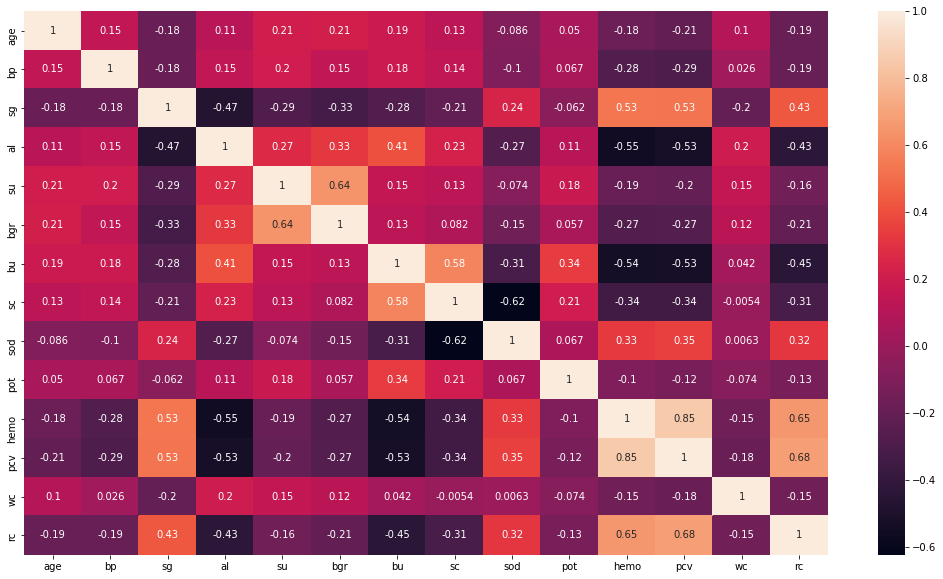

In [191]:
corr = df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)
plt.show()

In [192]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
print(cat_cols)

Number of Categorical Variables :  11
['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


**Analyzing Categorically**

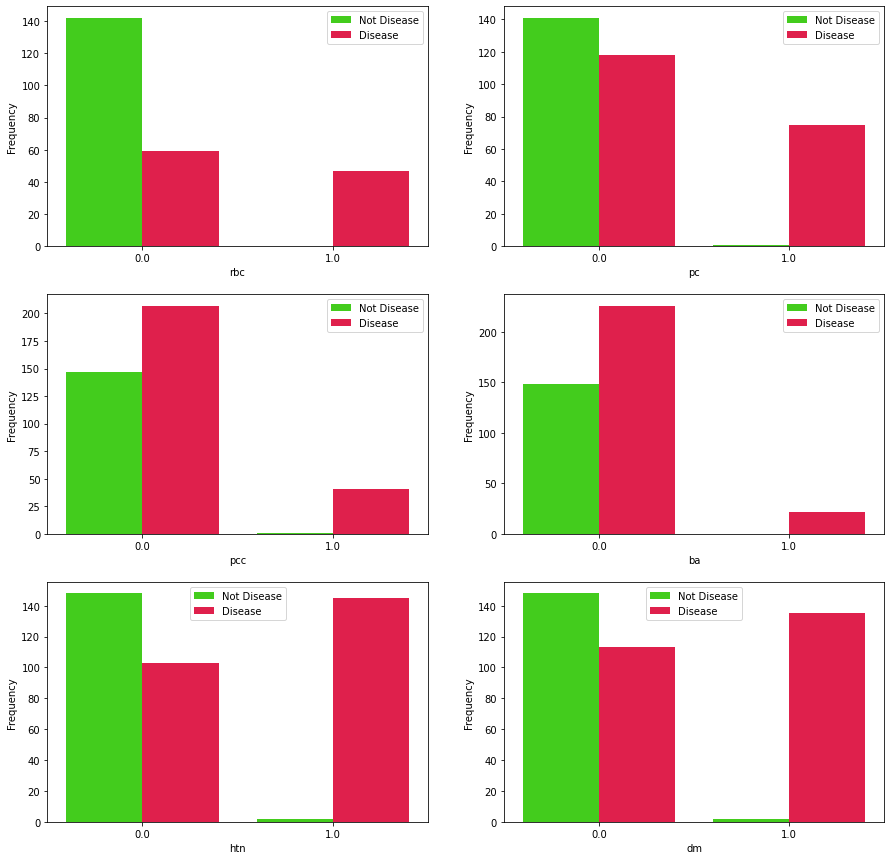

In [193]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
fs = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for i, axi in enumerate(axes.flat):
    sns.countplot(x=fs[i], hue='classification', data=df, palette='prism', ax=axi) 
    axi.set(ylabel='Frequency')
    axi.legend(["Not Disease", "Disease"])

In [194]:
num_cols = [col for col in df.columns if df[col].dtypes != 'O' and col not in "id"]
print('Number of numeric variables: ', len(num_cols))

num_cols

Number of numeric variables:  14


['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

**Visualizing features**

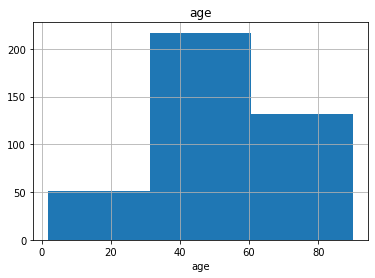

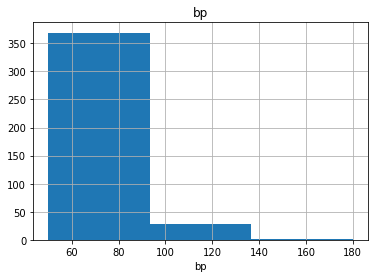

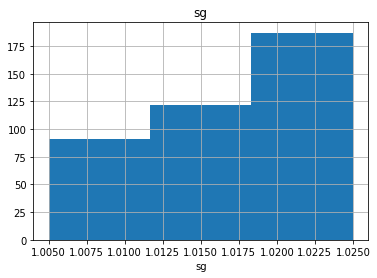

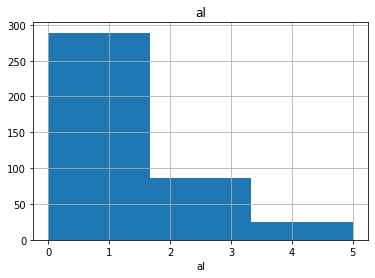

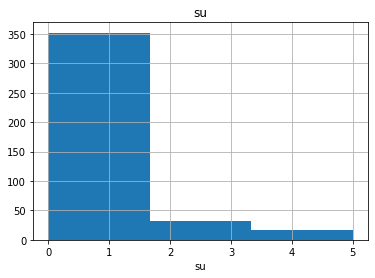

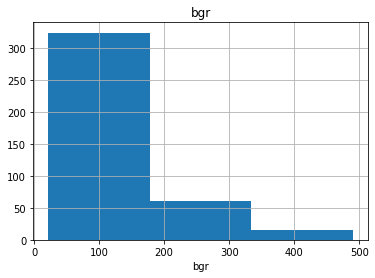

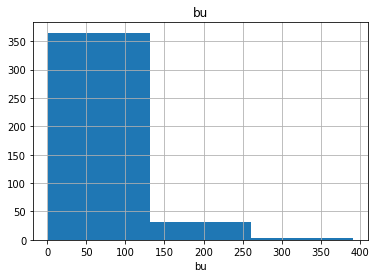

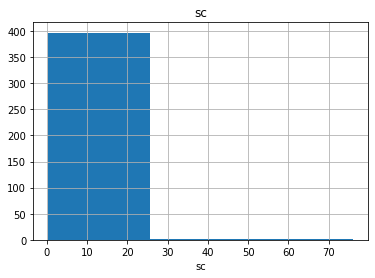

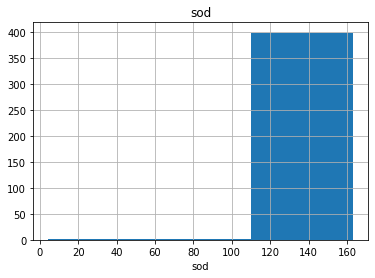

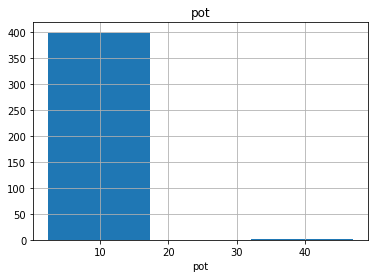

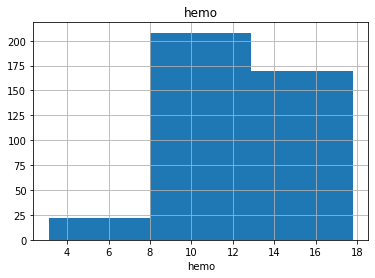

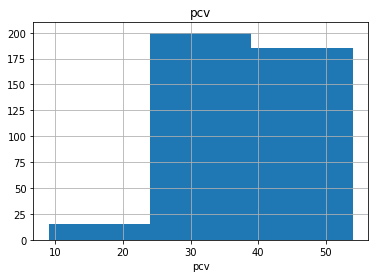

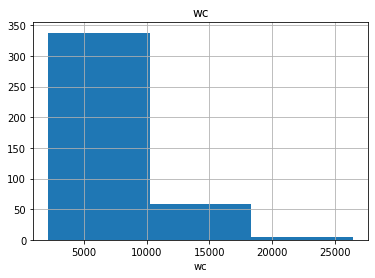

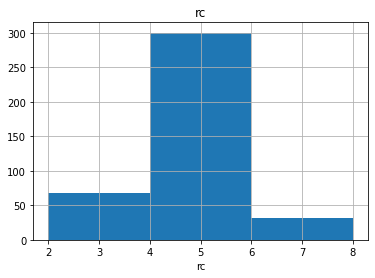

14 variables have been plotted


In [195]:
numeric_cols1= ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

def hist_for_nums(data, numeric_cols1):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols1:
        data[col].hist(bins=3)
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables have been plotted")
hist_for_nums(df, numeric_cols1)

In [196]:
df["classification"].value_counts()

1    248
0    152
Name: classification, dtype: int64

**Analysing the targets**

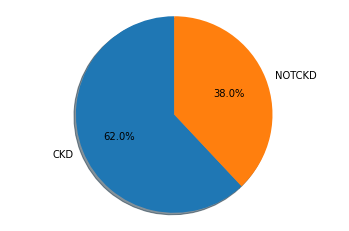

In [197]:
fig1, ax1 = plt.subplots()
ax1.pie(df["classification"].value_counts(), labels=['CKD','NOTCKD'], autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [198]:
cat_cols = [col for col in df.columns if df[col].dtypes == 'O']
print('Number of Categorical Variables : ', len(cat_cols))
cat_cols

Number of Categorical Variables :  11


['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [199]:
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df= pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns
df, cat_cols = one_hot_encoder(df, nan_as_category= True)

In [200]:
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,rbc_0.0,rbc_1.0,rbc_nan,pc_0.0,pc_1.0,pc_nan,pcc_0.0,pcc_1.0,pcc_nan,ba_0.0,ba_1.0,ba_nan,htn_0.0,htn_1.0,htn_nan,dm_0.0,dm_1.0,dm_nan,cad_0.0,cad_1.0,cad_nan,appet_0.0,appet_1.0,appet_nan,pe_0.0,pe_1.0,pe_nan,ane_0.0,ane_1.0,ane_nan,classification_0.0,classification_1.0,classification_nan
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.000000,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.241636,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.241636,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.000000,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.000000,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0


In [201]:
X = df.drop("classification_nan", axis=1)
y = df[["classification_1.0"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=46)

In [202]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [203]:
lgbm = LGBMClassifier(random_state=46)
lgbm.fit(X_train, y_train)
Lgbm_pred = lgbm.predict(X_test)
acc_lgbm = round(lgbm.score(X_train, y_train) * 100, 2)
acc_lgbm

100.0

In [204]:
xgboost = XGBClassifier(random_state=46)
xgboost.fit(X_train, y_train)
xgboost_pred = xgboost.predict(X_test)
acc_xgboost = round(xgboost.score(X_train, y_train) * 100, 2)
acc_xgboost

100.0

In [205]:
DecisionTree = XGBClassifier(random_state=46)
DecisionTree.fit(X_train, y_train)
DecisionTree_pred = DecisionTree.predict(X_test)
acc_DecisionTree = round(DecisionTree.score(X_train, y_train) * 100, 2)
acc_DecisionTree

100.0

In [206]:
models = pd.DataFrame({
    'Model': ["LightGBM",'Decision Tree', "XGBOOST"],
    'Score': [acc_lgbm,acc_DecisionTree, acc_xgboost]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,LightGBM,100.0
1,Decision Tree,100.0
2,XGBOOST,100.0
